In [1]:
import os
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as sps

In [2]:
call= pd.read_excel('las-call-outs-time-of-day.xlsx', sheet_name='Borough',header=3)
nteb=pd.read_excel('night-time-economy.xls',sheet_name='NTE businesses London boroughs',header=3,nrows=210)
ntee=pd.read_excel('night-time-economy.xls',sheet_name='NTE employees London boroughs',header=3,nrows=210)
call.rename(columns={'Unnamed: 0':'borough'},inplace=True)
ntee.rename(columns={'Unnamed: 0':'area_code','Unnamed: 1':'area_name','Unnamed: 2':'type'},inplace=True)
nteb.rename(columns={'Unnamed: 0':'area_code','Unnamed: 1':'area_name','Unnamed: 2':'type'},inplace=True)
earn=pd.read_excel('earnings-residence-borough.xlsx',sheet_name='Total, weekly',header=3,nrows=32)
earn=earn[['City of London','#.24']]
earn.columns=['boro','pay']
pop=pd.read_csv('housing-density-borough.csv')
pop=pop[pop.Year==2017]
workless=pd.read_excel('workless-households-borough.xlsx', sheet_name='2017',header=3,nrows=33)
workless=workless[['Unnamed: 1','Unnamed: 7']]
workless.columns=['boro','workless household']
wellbe=pd.read_excel('personal-well-being-borough.xlsx',sheet_name='Summary - Mean Scores',header=3,nrows=32)
wellbe=wellbe[['City of London','Unnamed: 8','x.26']]
wellbe.columns=['boro','Life Satisfaction','Anxiety']
pop=pop[['Name','Population']]
pop.columns=['boro','population']

In [3]:
ntee17=ntee[['area_name','type',2017]].copy()
nteb17=ntee[['area_name','type',2017]].copy()
call17=call[['borough','2017/18']].copy()

In [4]:
tempe=ntee17.pivot(index="area_name",columns="type",values=2017)
tempb=nteb17.pivot(index="area_name",columns="type",values=2017)

In [5]:
tempb.drop(columns=['Any Night Time Economy category','Total in all sectors'],inplace=True)
tempe.drop(columns=['Any Night Time Economy category','Total in all sectors'],inplace=True)

In [6]:
tempe.columns

Index(['24-hour health and personal social services',
       'Activities which support night time cultural and leisure activities',
       'Activities which support wider social and economic activities',
       'Cultural and leisure activities'],
      dtype='object', name='type')

In [7]:
tempe.columns=['NTE_employee_1',
       'NTE_employee_2',
       'NTE_employee_4',
       'NTE_employee_3']
tempb.columns=['NTE_business_1',
       'NTE_business_2',
       'NTE_business_4',
       'NTE_business_3']


In [12]:
temp1=pd.merge(call17,tempe,how='inner',left_on='borough',right_on='area_name')
temp1=pd.merge(temp1,tempb,how='inner',left_on='borough',right_on='area_name')
# temp1.drop([32,31],inplace=True)


In [13]:
temp1

,borough,2017/18,NTE_employee_1,NTE_employee_2,NTE_employee_4,NTE_employee_3,NTE_business_1,NTE_business_2,NTE_business_4,NTE_business_3
0,Barking and Dagenham,585.000,3800,4200,9100,4700,3800,4200,9100,4700
1,Barnet,682.000,14200,9100,5500,13100,14200,9100,5500,13100
2,Bexley,459.000,6600,6200,6300,7000,6600,6200,6300,7000
3,Brent,1030.000,15500,8200,13200,13100,15500,8200,13200,13100
4,Bromley,560.000,12100,7400,4700,12100,12100,7400,4700,12100
5,Camden,988.000,31400,10700,27900,43700,31400,10700,27900,43700
6,Croydon,933.000,10700,8900,5700,10700,10700,8900,5700,10700
7,Ealing,781.000,9600,8900,14700,13000,9600,8900,14700,13000
8,Enfield,658.000,12200,8100,8500,9600,12200,8100,8500,9600
9,Greenwich,777.000,11100,6500,5500,10300,11100,6500,5500,10300


In [9]:
alldata=pd.merge(temp1,pop,how='inner',left_on='borough',right_on='boro')
alldata=pd.merge(alldata,workless,how='inner',left_on='borough',right_on='boro')
alldata=pd.merge(alldata,wellbe,how='inner',left_on='borough',right_on='boro')
alldata=pd.merge(alldata,earn,how='inner',left_on='borough',right_on='boro')
alldata.drop(columns=['borough','boro_x','boro_y'],inplace=True)
alldata.rename(columns={"2017/18": "case(y)",'Life Satisfaction':'satisfaction','pay':'income','workless household':'workless'},inplace=True)
# alldata['case']=alldata['case']/alldata['population']
# alldata['NTE_employee_1']=alldata['NTE_employee_1']/alldata['population']
# alldata['NTE_employee_2']=alldata['NTE_employee_2']/alldata['population']
# alldata['NTE_employee_3']=alldata['NTE_employee_3']/alldata['population']
# alldata['NTE_employee_4']=alldata['NTE_employee_4']/alldata['population']
# alldata['NTE_business_1']=alldata['NTE_business_1']/alldata['population']
# alldata['NTE_business_2']=alldata['NTE_business_2']/alldata['population']
# alldata['NTE_business_3']=alldata['NTE_business_3']/alldata['population']
# alldata['NTE_business_4']=alldata['NTE_business_4']/alldata['population']
modeldata=alldata.drop(columns=['case(y)'])

/tmp/ipykernel_118/712812134.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'boro_x'} in the result is deprecated and will raise a MergeError in a future version.
  alldata=pd.merge(alldata,earn,how='inner',left_on='borough',right_on='boro')


In [163]:
alldata

,case(y),NTE_employee_1,NTE_employee_2,NTE_employee_4,NTE_employee_3,NTE_business_1,NTE_business_2,NTE_business_4,NTE_business_3,population,workless,satisfaction,Anxiety,income
0,585.000,3800,4200,9100,4700,3800,4200,9100,4700,210513,13.7,7.66,2.85,461.0
1,682.000,14200,9100,5500,13100,14200,9100,5500,13100,391446,10.7,7.63,2.78,522.6
2,459.000,6600,6200,6300,7000,6600,6200,6300,7000,247179,12.1,7.42,3.04,513.0
3,1030.000,15500,8200,13200,13100,15500,8200,13200,13100,332750,12.9,7.79,2.70,471.0
4,560.000,12100,7400,4700,12100,12100,7400,4700,12100,330909,8.2,7.31,3.16,608.0
5,933.000,10700,8900,5700,10700,10700,8900,5700,10700,386346,13.6,7.49,3.27,538.5
6,781.000,9600,8900,14700,13000,9600,8900,14700,13000,347126,10.2,7.55,3.23,517.2
7,658.000,12200,8100,8500,9600,12200,8100,8500,9600,335647,17.6,7.34,2.63,479.8
8,777.000,11100,6500,5500,10300,11100,6500,5500,10300,282774,13.4,7.47,3.15,553.0
9,953.974,9600,4500,7900,15400,9600,4500,7900,15400,277475,17.2,7.34,3.23,558.1


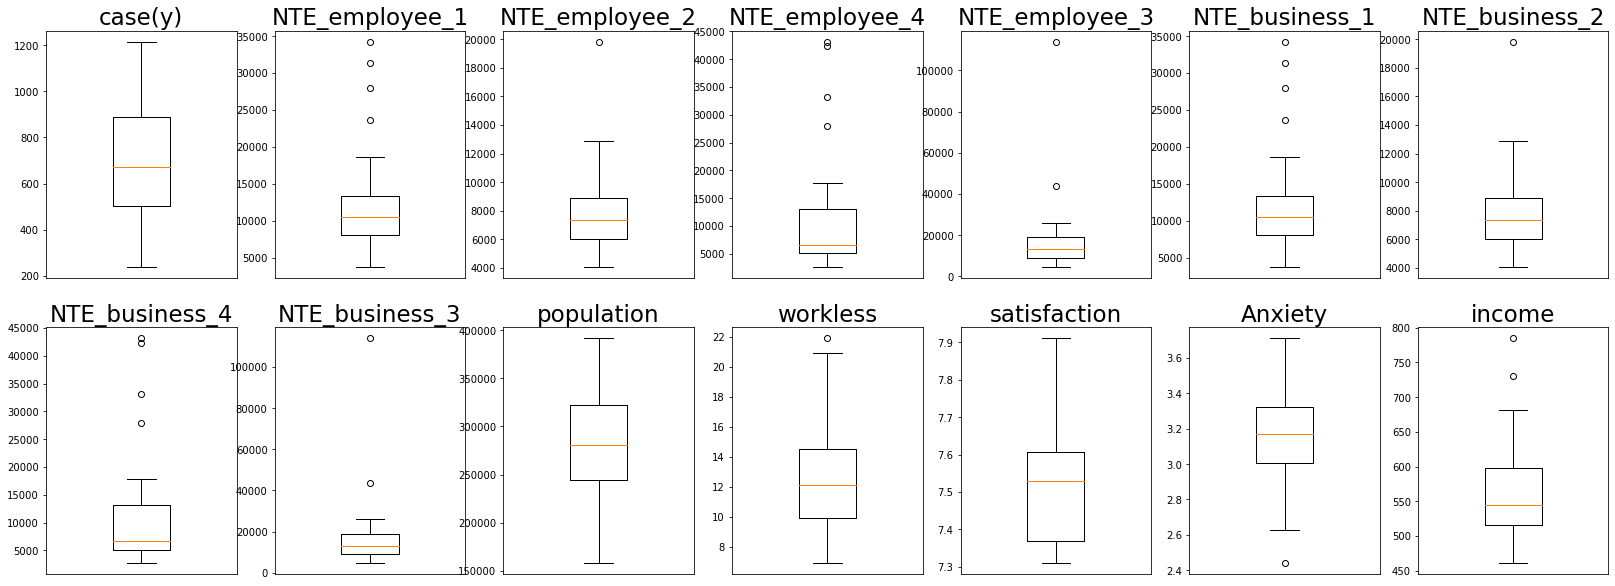

In [172]:
plt.subplots(figsize=(28,10))
plt.xlim([0.75,1.25])
plt.xticks([])
n=1
for x in alldata:
    plt.subplot(2,7,n)
    plt.boxplot(alldata[x], manage_ticks=(False))
    plt.title(x,fontsize = 23)
    plt.xlim([0.75,1.25])
    plt.xticks([])
    n=n+1
# plt.boxplot(alldata['NTE_employee_1'], manage_ticks=(False)) 
# plt.boxplot(alldata['NTE_employee_2'], manage_ticks=(False))   
# plt.boxplot(alldata['NTE_employee_3'], manage_ticks=(False))   
# plt.boxplot(alldata['NTE_employee_4'], manage_ticks=(False))   
# plt.savefig(output_filename)
# for x in alldata:
    
#     print(alldata[x])


Text(0.5, 1.0, 'Correlation Matrix')

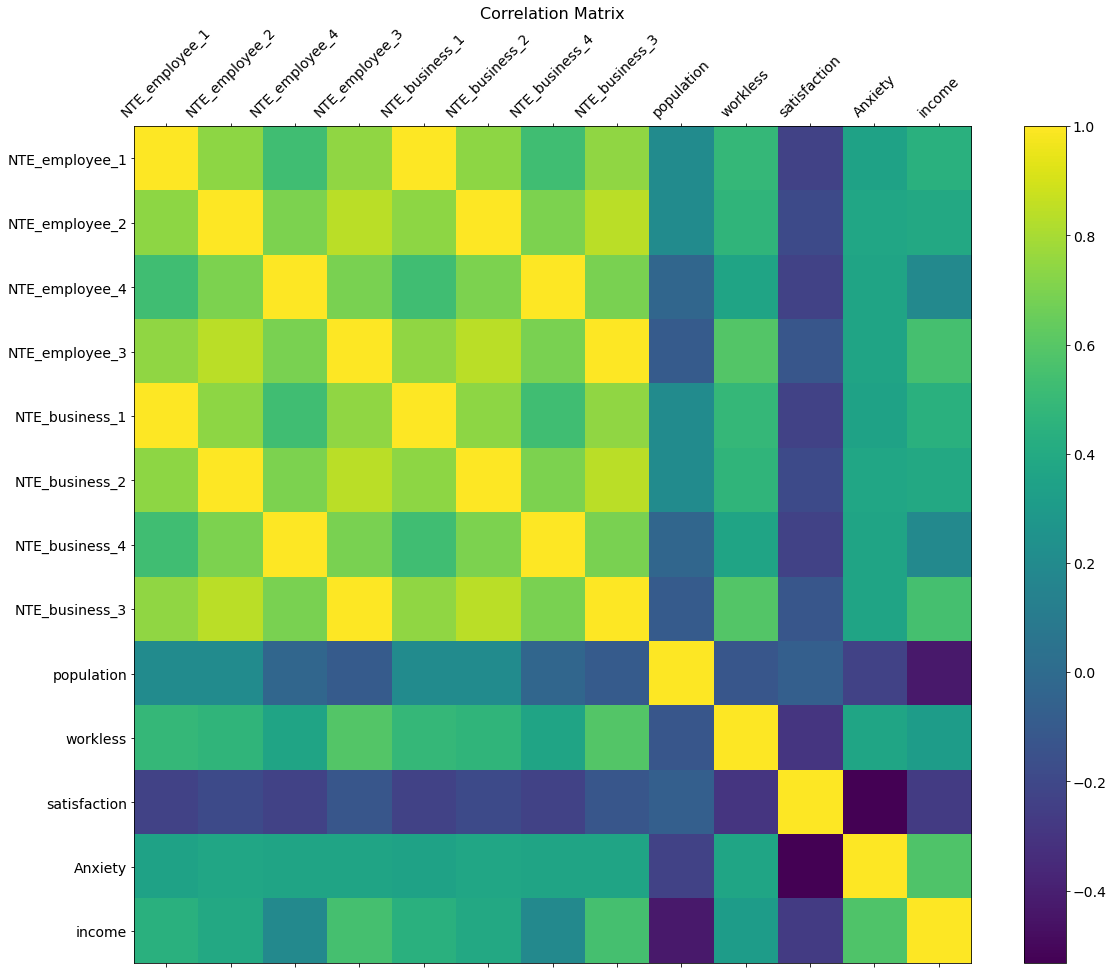

In [115]:
df = modeldata
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [160]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=10):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            print('No VIF is above threshold. Exit the loop')
            break

    return df

In [183]:
modeldata= drop_column_using_vif_(modeldata)
# modeldata.drop(columns=[])
model = sm.OLS(endog=alldata['case(y)'], exog=sm.add_constant(modeldata)).fit()
model.summary()

No VIF is above threshold. Exit the loop


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                case(y)   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     7.529
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           7.20e-05
Time:                        02:14:33   Log-Likelihood:                -192.83
No. Observations:                  31   AIC:                             405.7
Df Residuals:                      21   BIC:                             420.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             97.9623   2020.861      0.048      0.962   -4104.649    4300.574
NTE_business_1     0.0136      0.008      1.776      0.090      -0.002       0.030
NTE_business_2    -0.0136      0.022     -0.631      0.535      -0.059       0.031
NTE_business_4    -0.0032      0.005     -0.627      0.537      -0.014       0.007
NTE_business_3     0.0032      0.009      0.349      0.730      -0.016       0.022
population         0.0023      0.001      3.258      0.004       0.001       0.004
workless          13.3814     10.375      1.290      0.211      -8.195      34.958
satisfaction     -70.7034    215.751     -0.328      0.746    -519.383     377.976
Anxiety          319.0751    146.400      2.179      0.041      14.619     623.532
income            -1.3461      0.681     -1.976      0.061      -2.763       0.070
==============================================================================
Omnibus:                        5.076   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                1.921
Skew:                           0.191   Prob(JB):                        0.383
Kurtosis:                       1.842   Cond. No.                     2.19e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

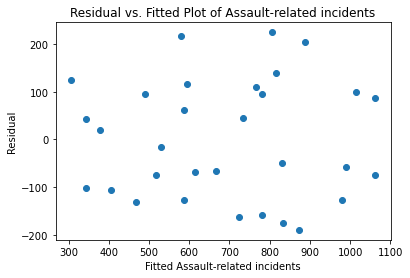

In [180]:
# plot residual
plt.scatter(model.fittedvalues, model.resid)
# adding title and labels
plt.xlabel('Fitted Assault-related incidents')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of Assault-related incidents')
plt.show()

In [31]:
temp1['2017/18']

0      585.000
1      682.000
2      459.000
3     1030.000
4      560.000
5      988.000
6      933.000
7      781.000
8      658.000
9      777.000
10     953.974
11     444.000
12     876.000
13     430.000
14     515.000
15     622.000
16     650.000
17     796.000
18     398.983
19     300.000
20    1149.000
21     876.000
22     386.000
23    1092.000
24     601.000
25     240.000
26    1115.000
27     338.000
28     851.000
29     546.000
30     712.000
31    1214.000
Name: 2017/18, dtype: float64

In [182]:
modeldata= drop_column_using_vif_(modeldata)
# modeldata.drop(columns=[])
model = sm.OLS(endog=alldata['case(y)'], exog=sm.add_constant(modeldata[['population','Anxiety']])).fit()
model.summary()

No VIF is above threshold. Exit the loop


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                case(y)   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     19.61
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           4.73e-06
Time:                        02:14:02   Log-Likelihood:                -201.60
No. Observations:                  31   AIC:                             409.2
Df Residuals:                      28   BIC:                             413.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1213.8980    396.360     -3.063      0.005   -2025.806    -401.990
population     0.0031      0.001      6.012      0.000       0.002       0.004
Anxiety      328.3185    107.208      3.062      0.005     108.712     547.925
==============================================================================
Omnibus:                        1.541   Durbin-Watson:                   2.649
Prob(Omnibus):                  0.463   Jarque-Bera (JB):                1.073
Skew:                           0.151   Prob(JB):                        0.585
Kurtosis:                       2.140   Cond. No.                     3.82e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

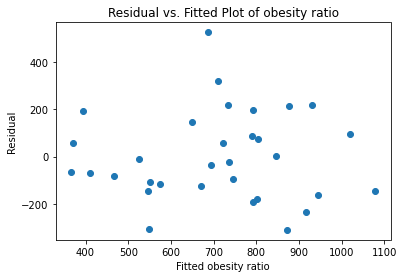

In [176]:
# plot residual
plt.scatter(model.fittedvalues, model.resid)
# adding title and labels
plt.xlabel('Fitted obesity ratio')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of obesity ratio')
plt.show()


In [142]:
model.resid

0     190.963560
1    -234.537642
2    -114.816258
3     320.136034
4    -310.764714
5     197.083351
6    -145.427757
7    -164.200182
8     -35.302440
9      55.598901
10    219.665200
11   -105.842268
12     86.978986
13     58.570409
14    -10.015806
15   -180.112463
16    -94.819192
17    145.749723
18   -147.149565
19    -65.622673
20    219.580042
21     72.266883
22    -80.727235
23    214.586263
24   -191.565715
25   -307.921003
26     95.934806
27    -71.712341
28      4.192914
29   -123.725034
30    -23.587033
31    526.542250
dtype: float64